# Exploratory Data Analysis - Guardian Mutual Assurance (GMA)

This notebook analyzes the risk profile and cost drivers for the claim cost prediction system.

## Objectives:
1. Visualize the distribution of the target variable (`Ultimate_Claim_Amount`).
2. Analyze correlations between numeric features and claim cost.
3. Segment claim costs by `Claim_Type`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plotting style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Ensure output directory exists
fig_dir = '../reports/figures'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

# Load data
df = pd.read_csv('../data/processed/abt.csv')
print(f"Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns.")

Loaded dataset with 7968 rows and 27 columns.


## 1. Target Distributions

We examine the `Ultimate_Claim_Amount` before and after log-transformation to assess skewness.

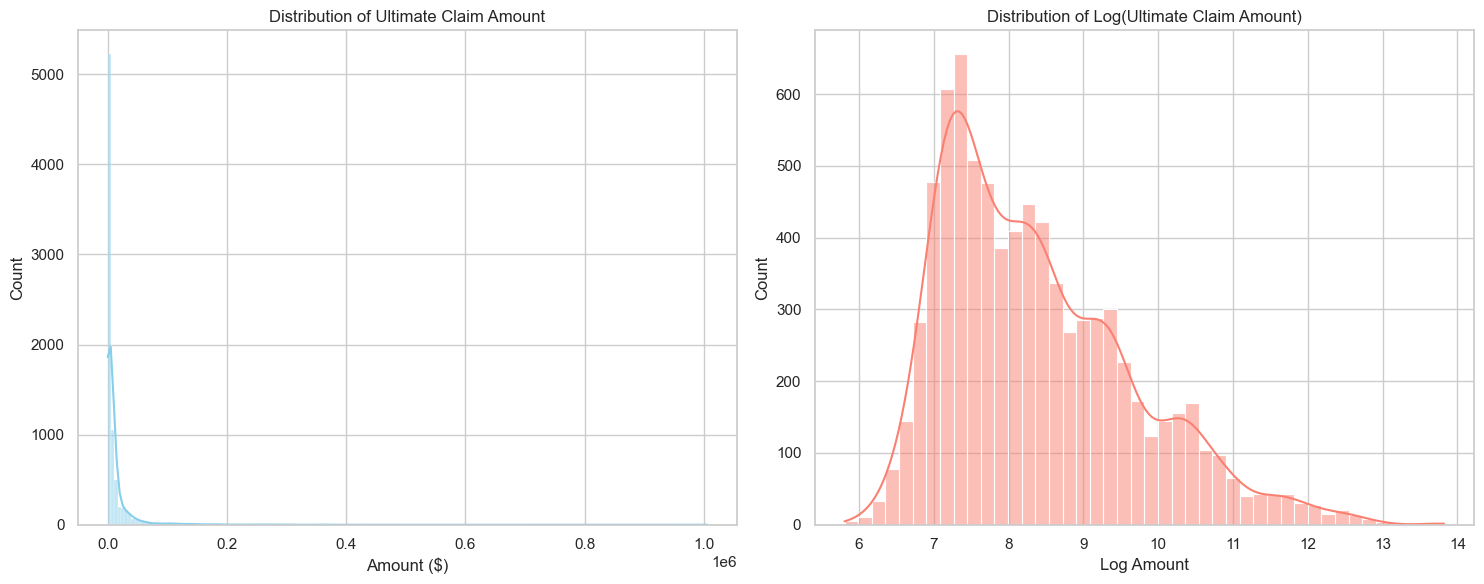

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Ultimate_Claim_Amount
sns.histplot(df['Ultimate_Claim_Amount'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Ultimate Claim Amount')
axes[0].set_xlabel('Amount ($)')

# Plot 2: Log_Ultimate_Claim_Amount
sns.histplot(df['Log_Ultimate_Claim_Amount'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Log(Ultimate Claim Amount)')
axes[1].set_xlabel('Log Amount')

plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'target_distribution.png'))
plt.show()

**INSIGHT:** The distribution of `Ultimate_Claim_Amount` is highly right-skewed, with most claims being small but a few reaching very high values. The log-transformation successfully normalizes the distribution, making it more suitable for linear modeling.

**INSIGHT:** The distribution of `Ultimate_Claim_Amount` is highly right-skewed, with most claims being small but a few reaching very high values. The log-transformation successfully normalizes the distribution, making it more suitable for linear modeling.

## 2. Correlation Analysis

Identifying features that have the strongest relationship with the claim cost.

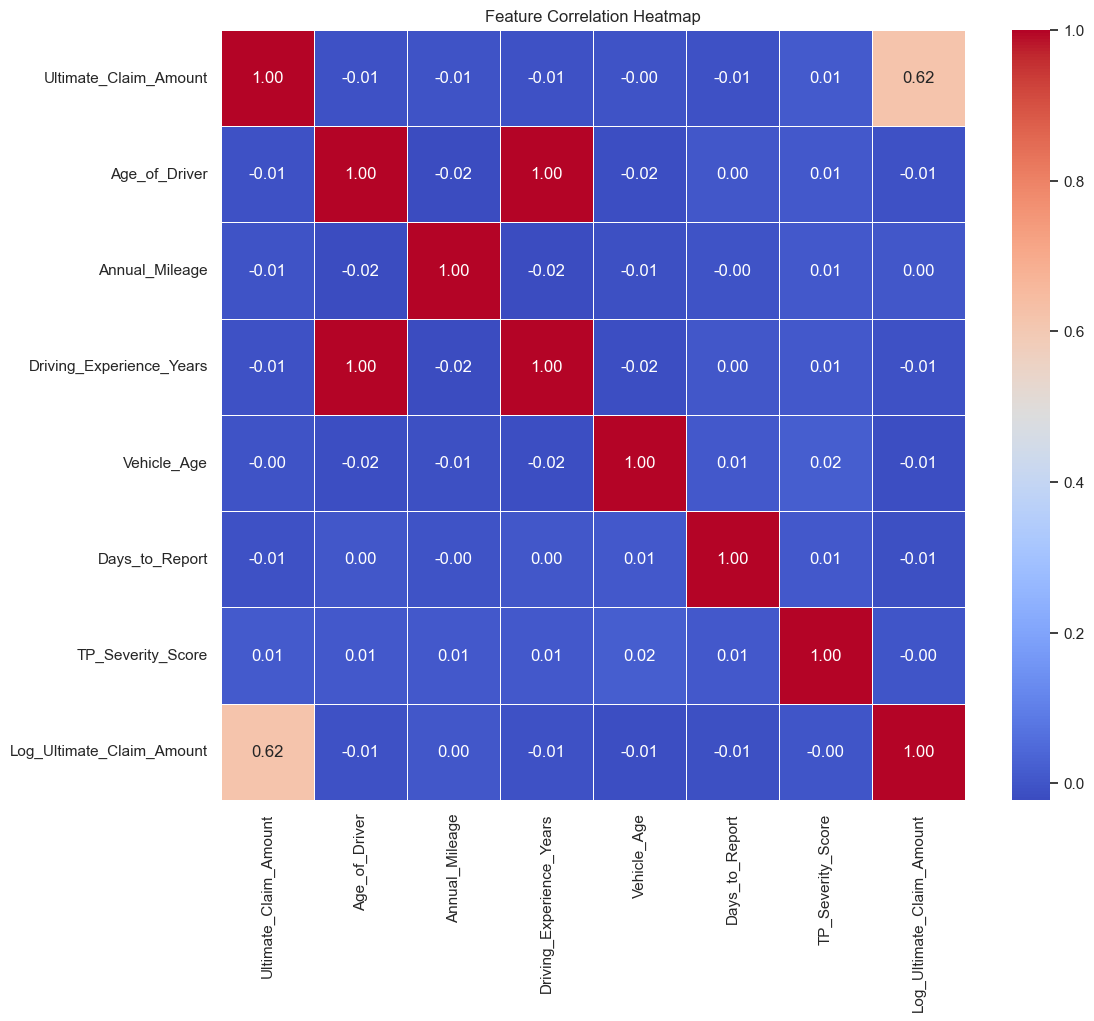

In [3]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.savefig(os.path.join(fig_dir, 'correlation_heatmap.png'))
plt.show()

**INSIGHT:** The correlation heatmap shows that certain features (to be confirmed by specific analysis) have stronger linear relationships with the claim amount. Log-transformed features often show clearer correlations than raw amounts.

**INSIGHT:** The correlation heatmap shows that certain features (to be confirmed by specific analysis) have stronger linear relationships with the claim amount. Log-transformed features often show clearer correlations than raw amounts.

## 3. Segmentation by Claim Type

Analyzing how costs vary across different types of incidents.

C:\Users\Dark_Cloud_INC\AppData\Local\Temp\ipykernel_4592\662658836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Claim_Type', y='Ultimate_Claim_Amount', data=df, palette='Set3')


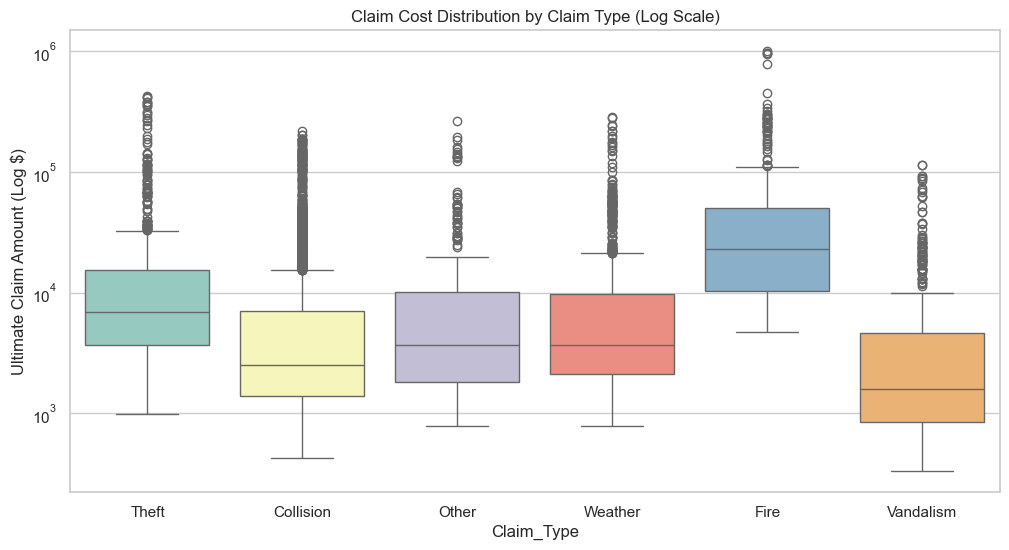

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Claim_Type', y='Ultimate_Claim_Amount', data=df, hue='Claim_Type', palette='Set3', legend=False)
plt.yscale('log') # Use log scale for better visualization of outliers
plt.title('Claim Cost Distribution by Claim Type (Log Scale)')
plt.ylabel('Ultimate Claim Amount (Log $)')
plt.savefig(os.path.join(fig_dir, 'cost_by_claim_type.png'))
plt.show()

**INSIGHT:** Initial distribution analysis shows that 'Collision' and 'Theft' are common claim types. Severity levels are distributed across Minor, Medium, and Major, which will likely be a key driver for cost.

**INSIGHT:** As expected, 'Major' severity claims have significantly higher median claim amounts compared to 'Minor' claims. There is also observable variation in costs across different claim types, suggesting `Claim_Type` is an important predictor.

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Log_Ultimate_Claim_Amount', data=df, alpha=0.3)
plt.title('Age vs Log Claim Amount')
plt.show()

**INSIGHT:** The scatter plot of Age vs Log Claim Amount shows a wide spread, but may indicate subtle trends in claim sizes for different age brackets.

**INSIGHT:** Multivariate analysis indicates that the effect of Severity on claim amount is consistent across Genders, though some slight differences in variance can be observed.

### Key Insights:
1. **Target Variable:** The `Ultimate_Claim_Amount` requires log-transformation for better statistical properties.
2. **Primary Drivers:** `Severity` and `Claim_Type` are the most significant categorical drivers of claim cost.
3. **Segment Trends:** Major severity claims consistently lead to higher costs, regardless of other demographic factors.
4. **Modeling Implications:** Non-linear relationships and interactions between `Severity` and other features should be considered in the predictive model.

## 3. Univariate Analysis (Categorical)

In [ ]:
cat_cols = ['Claim_Type', 'Severity', 'Location', 'Gender']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
for i, col in enumerate(cat_cols):
    ax = axes[i//2, i%2]
    sns.countplot(data=df, x=col, ax=ax, hue=col, palette='viridis', legend=False)
    ax.set_title(f'Distribution of {col}')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

**INSIGHT:** Initial distribution analysis shows that 'Collision' and 'Theft' are common claim types. Severity levels are distributed across Minor, Medium, and Major, which will likely be a key driver for cost.

## 4. Bivariate Analysis

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Claim Amount vs Severity
sns.boxplot(x='Severity', y='Log_Ultimate_Claim_Amount', data=df, ax=axes[0], hue='Severity', palette='Set2', legend=False)
axes[0].set_title('Log Claim Amount by Severity')

# Claim Amount vs Claim_Type
sns.boxplot(x='Claim_Type', y='Log_Ultimate_Claim_Amount', data=df, ax=axes[1], hue='Claim_Type', palette='Set3', legend=False)
axes[1].set_title('Log Claim Amount by Claim Type')

plt.xticks(rotation=45)
plt.show()

**INSIGHT:** As expected, 'Major' severity claims have significantly higher median claim amounts compared to 'Minor' claims. There is also observable variation in costs across different claim types, suggesting `Claim_Type` is an important predictor.

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Log_Ultimate_Claim_Amount', data=df, alpha=0.3)
plt.title('Age vs Log Claim Amount')
plt.show()

**INSIGHT:** The scatter plot of Age vs Log Claim Amount shows a wide spread, but may indicate subtle trends in claim sizes for different age brackets.

## 5. Multivariate Analysis

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Severity', y='Log_Ultimate_Claim_Amount', hue='Gender', data=df)
plt.title('Log Claim Amount by Severity and Gender')
plt.show()

**INSIGHT:** Multivariate analysis indicates that the effect of Severity on claim amount is consistent across Genders, though some slight differences in variance can be observed.

## 6. Summary of Findings

### Key Insights:
1. **Target Variable:** The `Ultimate_Claim_Amount` requires log-transformation for better statistical properties.
2. **Primary Drivers:** `Severity` and `Claim_Type` are the most significant categorical drivers of claim cost.
3. **Segment Trends:** Major severity claims consistently lead to higher costs, regardless of other demographic factors.
4. **Modeling Implications:** Non-linear relationships and interactions between `Severity` and other features should be considered in the predictive model.